# Import packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import pickle

# Import data

In [3]:
stock_metadata_df = pd.read_excel('./Data/NASDAQ_stock_metadata.xlsx')

# Inspect the dataset
print(stock_metadata_df.head())

   Unnamed: 0  Institutional_ownership_share  Shares_outstanding  \
0           0                         0.7092          3048000000   
1           1                         0.9005          1577000000   
2           2                         0.6981          8664000000   
3           3                         0.7754          2082000000   
4           4                         0.6882          4120000000   

   Holdings_value_in_th_dollar stock_symbol  
0                    207836000          jpm  
1                     68693000           ms  
2                    145711000          bac  
3                     69960000            c  
4                     67540000          wfc  


In [4]:
inst_holdings_df = pd.read_excel('./Data/NASDAQ_INST_holdings.xlsx')

# Inspect the dataset
print(inst_holdings_df.head())

   Unnamed: 0                 OWNER NAME        DATE  SHARES HELD  \
0           0         VANGUARD GROUP INC  06/30/2020    232022891   
1           1             BLACKROCK INC.  06/30/2020    197486590   
2           2          STATE STREET CORP  06/30/2020    137399081   
3           3    CAPITAL WORLD INVESTORS  06/30/2020     72845777   
4           4  BANK OF AMERICA CORP /DE/  06/30/2020     64782964   

   CHANGE (SHARES) CHANGE (%) VALUE (IN 1,000S) stock_symbol  
0        -12874549    -5.257%       $22,311,321          jpm  
1         -6934713    -3.392%       $18,990,310          jpm  
2         -3487691    -2.476%       $13,212,296          jpm  
3        -18187444   -19.979%        $7,004,850          jpm  
4           834143     1.304%        $6,229,530          jpm  


In [22]:
inst_holdings_df['DATE'][0]

'06/30/2020'

# Parameters - tickers of interest

In [5]:
tickers = ['jpm' , 'ms','bac','c','wfc','gs','usb','tfc','bk','td']

In [7]:
bank_name_list = ['JPMORGAN CHASE & CO','MORGAN STANLEY','BANK OF AMERICA CORP /DE/',
                 'CITIGROUP INC','WELLS FARGO & COMPANY/MN','GOLDMAN SACHS GROUP INC',
                  "US BANCORP /DE/",'TRUIST FINANCIAL CORP',
                  'BANK OF NEW YORK MELLON CORP','TD ASSET MANAGEMENT INC']

# Data preprocessing

In [31]:
for i in range(0,len(inst_holdings_df)):
    if 'US BANCORP' in inst_holdings_df['OWNER NAME'].iloc[i]:
        inst_holdings_df['OWNER NAME'].iloc[i] = "US BANCORP /DE/"

/Users/MacBook/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
inst_holdings_df[(inst_holdings_df['OWNER NAME']=='US BANCORP /DE/')]

,Unnamed: 0,OWNER NAME,DATE,SHARES HELD,CHANGE (SHARES),CHANGE (%),"VALUE (IN 1,000S)",stock_symbol
380,5,US BANCORP /DE/,06/30/2020,11161089,-781292,-6.542%,"$402,915",usb


In [11]:
temp = inst_holdings_df[(inst_holdings_df['OWNER NAME']=='JPMORGAN CHASE & CO') & (inst_holdings_df['stock_symbol']=='gs')]

int(temp['SHARES HELD'])
# Placeholder

1073380

In [13]:
temp2 = stock_metadata_df[(stock_metadata_df['stock_symbol']=='jpm')] 

int(temp2['Shares_outstanding'])                          
# Placeholder

3048000000

In [33]:
# Initialize numpy array to store the results
n = len(tickers)
nasdaq_cross_holdings = np.zeros((n,n))
nasdaq_normalized_cross_holdings = np.zeros((n,n))

# Compute each cross-holding
for i in range(0,n):
    for j in range(0,n):
        
        stock = tickers[i]
        owner = bank_name_list[j]
        
        try:
            temp = inst_holdings_df[(inst_holdings_df['OWNER NAME']==owner) & (inst_holdings_df['stock_symbol']==stock)]
            #print(temp)
            shares_held = int(temp['SHARES HELD'])
            nasdaq_cross_holdings[i,j] = shares_held

            # Normalization with total number of shares outstanding
            temp2 = stock_metadata_df[(stock_metadata_df['stock_symbol']==stock)] 

            tot = int(temp2['Shares_outstanding'])
            nasdaq_normalized_cross_holdings[i,j] = shares_held / tot
        except:
            pass

## Convert to Pandas DF for later export

In [39]:
nasdaq_cross_holdings_df = pd.DataFrame(data=nasdaq_cross_holdings,index=tickers,columns=tickers)

# Inspect DF
print(nasdaq_cross_holdings_df.head())

            jpm          ms         bac          c         wfc          gs  \
jpm         0.0  37658262.0  64782964.0        0.0  28918389.0  13442368.0   
ms   51673147.0         0.0  16181971.0  2871179.0   3903990.0  17551382.0   
bac         0.0  51377446.0         0.0        0.0         0.0  38811959.0   
c           0.0         0.0         0.0        0.0         0.0         0.0   
wfc         0.0         0.0  29970996.0        0.0         0.0         0.0   

     usb  tfc          bk         td  
jpm  0.0  0.0  29646217.0        0.0  
ms   0.0  0.0  14288729.0  3777803.0  
bac  0.0  0.0         0.0        0.0  
c    0.0  0.0         0.0        0.0  
wfc  0.0  0.0  30020683.0        0.0  


In [40]:
nasdaq_normalized_cross_holdings_df = pd.DataFrame(data=nasdaq_normalized_cross_holdings,index=tickers,columns=tickers)

# Inspect DF
print(nasdaq_normalized_cross_holdings_df.head())

          jpm        ms       bac         c       wfc       gs  usb  tfc  \
jpm  0.000000  0.012355  0.021254  0.000000  0.009488  0.00441  0.0  0.0   
ms   0.032767  0.000000  0.010261  0.001821  0.002476  0.01113  0.0  0.0   
bac  0.000000  0.005930  0.000000  0.000000  0.000000  0.00448  0.0  0.0   
c    0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.0  0.0   
wfc  0.000000  0.000000  0.007275  0.000000  0.000000  0.00000  0.0  0.0   

           bk        td  
jpm  0.009726  0.000000  
ms   0.009061  0.002396  
bac  0.000000  0.000000  
c    0.000000  0.000000  
wfc  0.007287  0.000000  


# Data visualisation

In [34]:
# Parameters
figsize = 20

current_date = inst_holdings_df['DATE'][0]
current_date = current_date.replace("/", "_")

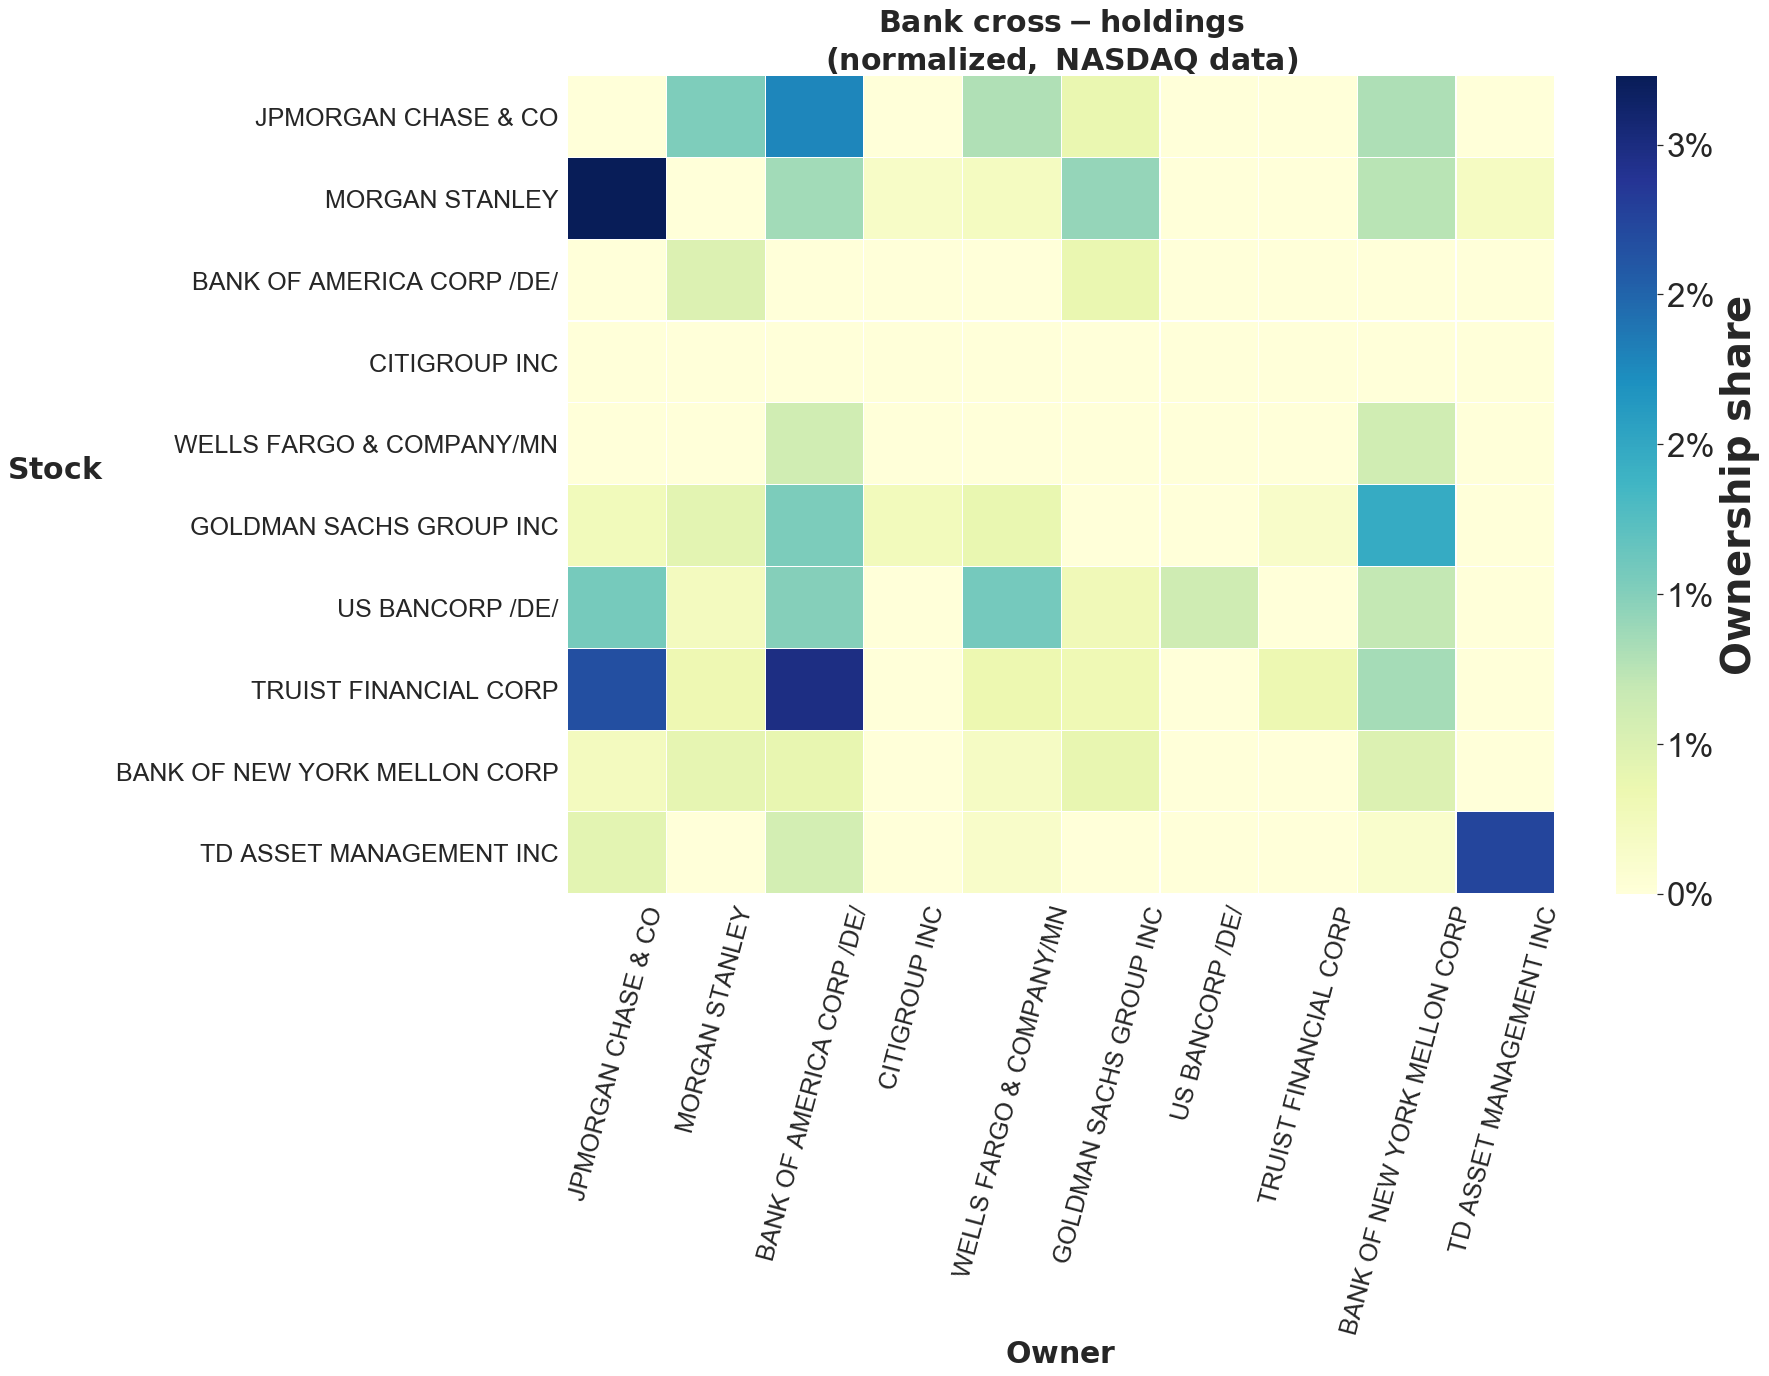

In [36]:
plt.rcParams["figure.figsize"] = (figsize*1.3,figsize)

n, d = nasdaq_normalized_cross_holdings.shape

x_labels = [bank_name_list[i] for i in range(0,d)]
x_places = [i+0.5 for i in range(0,d)]

y_labels = [bank_name_list[i] for i in range(0,n)]
y_places = [i+0.5 for i in range(0,n)]

sns.set(font_scale=3)
ax = sns.heatmap(nasdaq_normalized_cross_holdings*100, linewidth=0.1, cmap="YlGnBu",
            cbar_kws={'format': '%.0f%%'})
plt.xlabel(r"$\bf{Owner}$",fontsize=30)
plt.yticks(y_places,y_labels, rotation=0)
plt.xticks(x_places,x_labels, rotation=75)
plt.ylabel(r"$\bf{Stock}$",fontsize=30, rotation=0,labelpad=60)
plt.title(r"$\bf{Bank\ cross-holdings}$" + "\n" + r"$\bf{(normalized,\ NASDAQ\ data)}$",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.figure.axes[-1].set_ylabel(r'$\bf{Ownership\ share}$', size=40)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

#ax.figure.axes[-1].yaxis.label.set_size(30)
plt.tight_layout()
plt.savefig('./Figures/NASDAQ_cross_holdings_normalized_matrix_{}.pdf'.format(current_date),dpi=80)
plt.show()

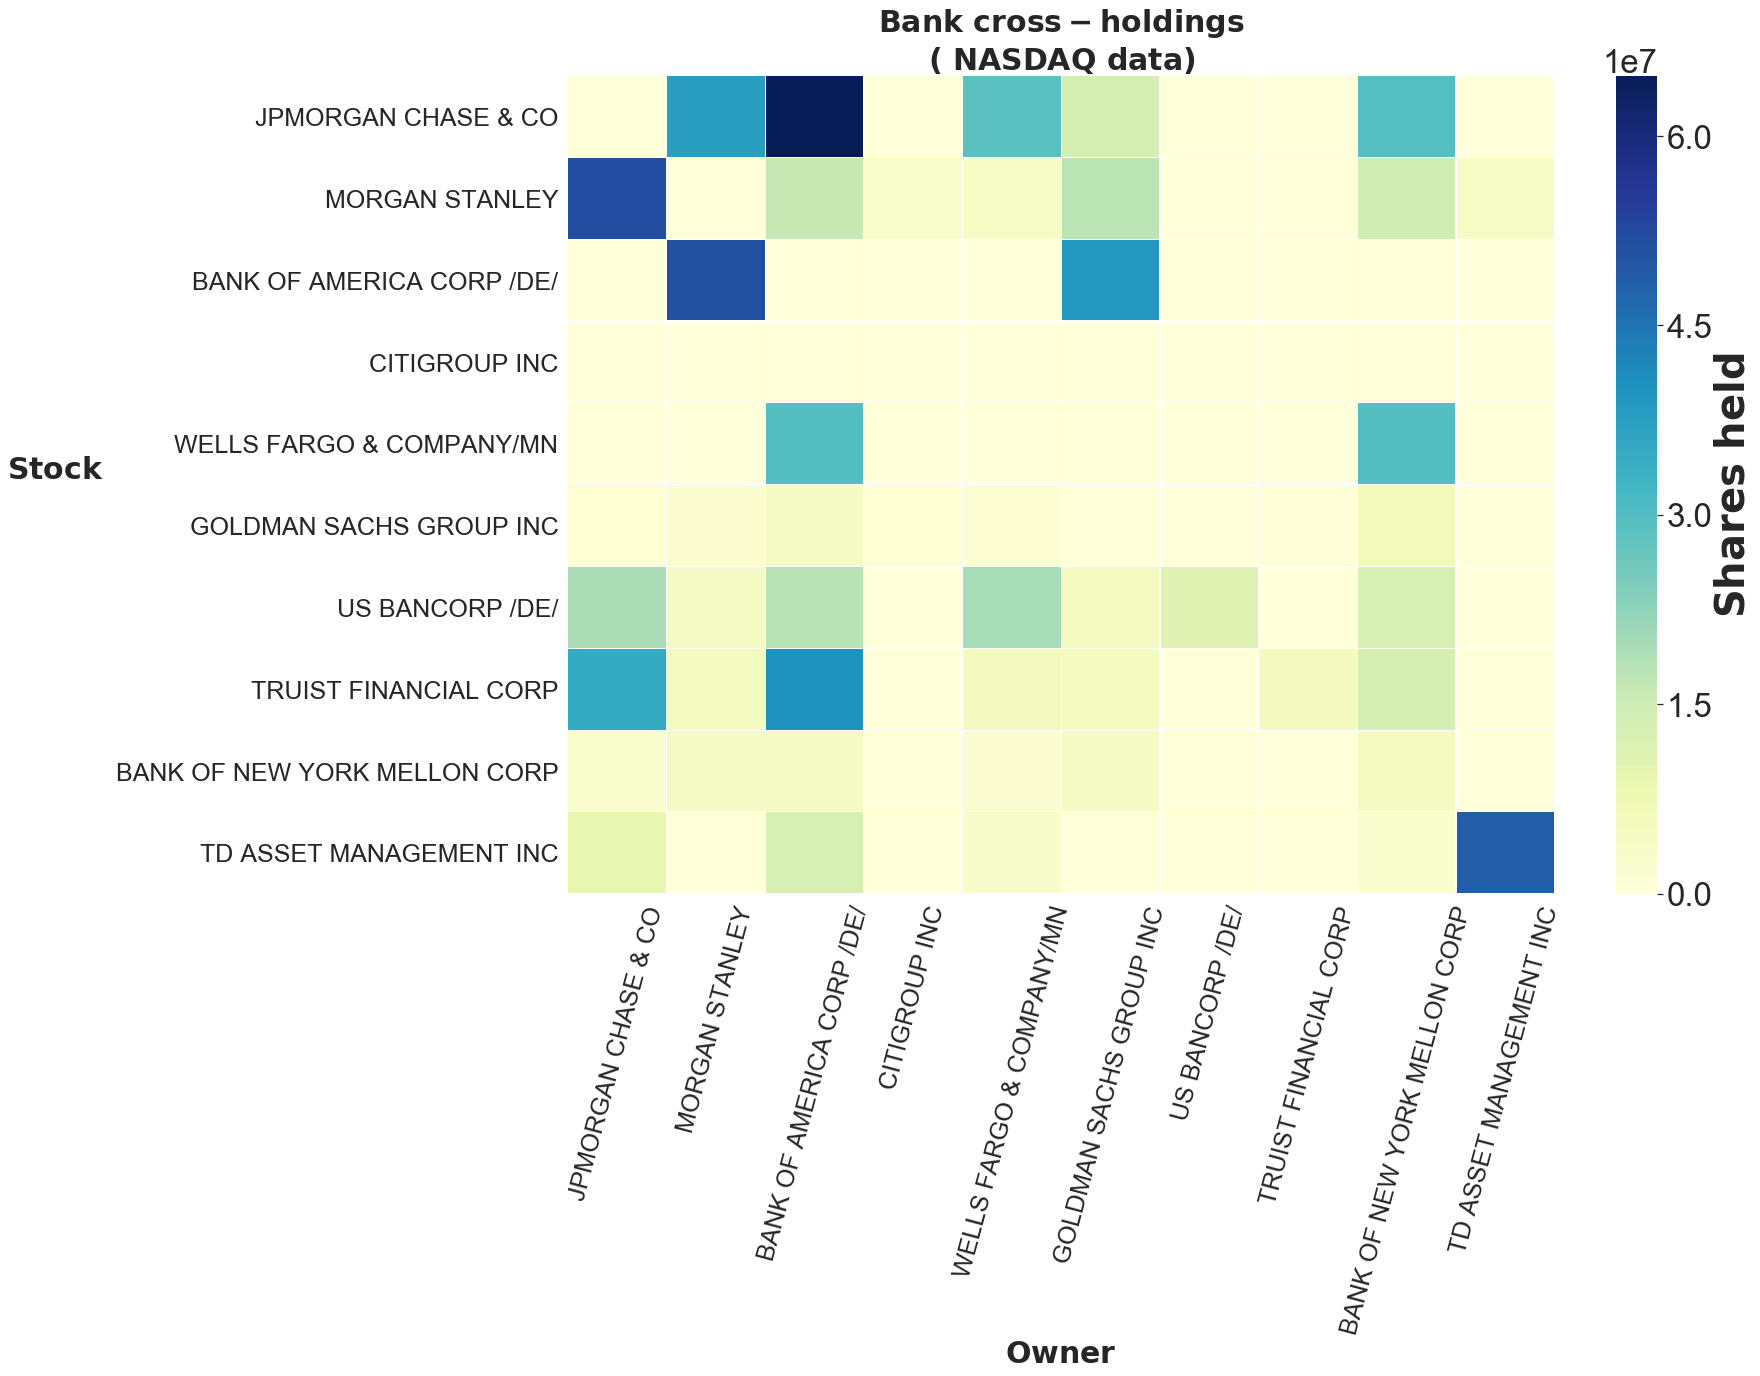

In [38]:
plt.rcParams["figure.figsize"] = (figsize*1.3,figsize)

n, d = nasdaq_cross_holdings.shape

x_labels = [bank_name_list[i] for i in range(0,d)]
x_places = [i+0.5 for i in range(0,d)]

y_labels = [bank_name_list[i] for i in range(0,n)]
y_places = [i+0.5 for i in range(0,n)]

sns.set(font_scale=3)
ax = sns.heatmap(nasdaq_cross_holdings, linewidth=0.1, cmap="YlGnBu")
plt.xlabel(r"$\bf{Owner}$",fontsize=30)
plt.yticks(y_places,y_labels, rotation=0)
plt.xticks(x_places,x_labels, rotation=75)
plt.ylabel(r"$\bf{Stock}$",fontsize=30, rotation=0,labelpad=60)
plt.title(r"$\bf{Bank\ cross-holdings}$" + "\n" + r"$\bf{(\ NASDAQ\ data)}$",fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.figure.axes[-1].set_ylabel(r'$\bf{Shares\ held}$', size=40)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

#ax.figure.axes[-1].yaxis.label.set_size(30)
plt.tight_layout()
plt.savefig('./Figures/NASDAQ_cross_holdings_matrix_{}.pdf'.format(current_date),dpi=80)
plt.show()

# Data export

In [41]:
# Save out results to Excel files
nasdaq_normalized_cross_holdings_df.to_excel('./Data/nasdaq_normalized_cross_holdings.xlsx', index=True)
nasdaq_cross_holdings_df.to_excel('./Data/nasdaq_cross_holdings.xlsx', index=True)